# 2. 广义线性可分SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 2.1 生成模拟数据

In [5]:
mean1, mean2 = np.array([0, 2]), np.array([2, 0])
covar = np.array([[1.5, 1.0], [1.0, 1.5]])
X1 = np.random.multivariate_normal(mean1, covar, 100)
y1 = np.ones(X1.shape[0])
X2 = np.random.multivariate_normal(mean2, covar, 100)
y2 = -1 * np.ones(X2.shape[0])
X_train = np.vstack((X1[:80], X2[:80]))
y_train = np.hstack((y1[:80], y2[:80]))
X_test = np.vstack((X1[80:], X2[80:]))
y_test = np.hstack((y1[80:], y2[80:]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(160, 2) (160,) (40, 2) (40,)


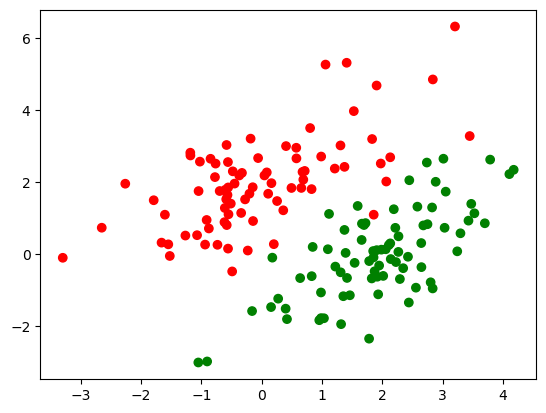

In [4]:
# 设置颜色参数
colors = {1:'r', -1:'g'}
# 绘制二分类数据集的散点图
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=pd.Series(y_train).map(colors))
plt.show();

## 2.2 广义线性可分支持向量机

In [6]:
from sklearn import svm
# 创建svm模型实例
clf = svm.SVC(kernel='linear')
# 模型拟合
clf.fit(X_train, y_train)
# 模型预测
y_pred = clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
# 计算测试集准确率
print(accuracy_score(y_test, y_pred))
# 计算测试集准确率
print('Accuracy of soft margin svm based on sklearn: ', 
      accuracy_score(y_test, y_pred))

1.0
Accuracy of soft margin svm based on sklearn:  1.0


## 2.3 结果可视化

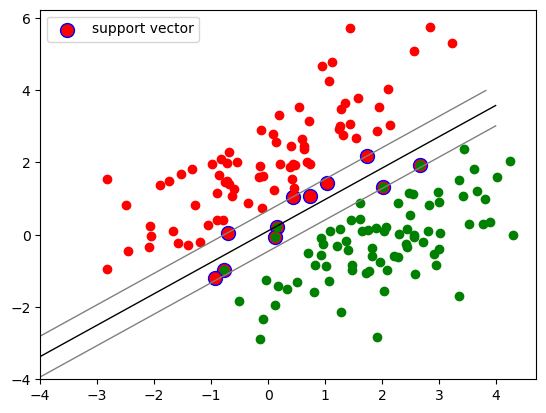

In [9]:
def plot_classifier(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "ro")
    plt.plot(X2_train[:,0], X2_train[:,1], "go")
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 
                s=100, c="r", edgecolors="b", label="support vector")

    X1, X2 = np.meshgrid(np.linspace(-4,4,50), np.linspace(-4,4,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.decision_function(X).reshape(X1.shape)
    plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')
    plt.legend()
    plt.show()
    
plot_classifier(X_train[y_train==1], X_train[y_train==-1], clf)